In [1]:
import csv
row_list = [["No. of hrs spent driving", "Risk Score"],
             [10,95],
             [9,80],
             [2,10],
             [15,50],
             [10,45],
             [16,98],
             [11,38],
             [16,93]
           ]
with open('LinearRegression.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('LinearRegression.csv')

In [32]:
df.head()

,No. of hrs spent driving,Risk Score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


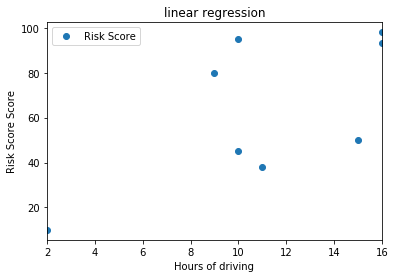

In [33]:
df.plot(x='No. of hrs spent driving', y='Risk Score', style='o')
plt.title('linear regression')
plt.xlabel('Hours of driving')
plt.ylabel('Risk Score Score')
plt.show()

In [34]:
df.shape

(8, 2)

In [35]:
mean_driving = sum(df['No. of hrs spent driving'])/float(len(df['No. of hrs spent driving']))
mean_driving

11.125

In [36]:
mean_risk_score = sum(df['Risk Score'])/float(len(df['Risk Score']))
mean_risk_score

63.625

In [37]:
def variance(values, mean):
    return sum([(val-mean)**2 for val in values])

In [38]:
def covariance(hrs_driving, mean_driving, risk_score , mean_risk_score):
    covariance = 0.0
    for r in range(len(hrs_driving)):
        covariance = covariance + ((hrs_driving[r] - mean_driving) * (risk_score[r] - mean_risk_score))
    return covariance

In [39]:
variance_driving, variance_risk = variance(df['No. of hrs spent driving'], mean_driving), variance(df['Risk Score'], mean_risk_score)
variance_driving , variance_risk

(152.875, 7361.875)

In [40]:
covariance_drving_score = covariance(df['No. of hrs spent driving'],mean_driving,df['Risk Score'],mean_risk_score)
covariance_drving_score

701.375

In [41]:
m = covariance_drving_score/ variance_driving
c = mean_risk_score - m * mean_driving
m,c

(4.58789860997547, 12.584627964022893)

In [42]:
risk_score = 4.5878 * 10 + 12.5846
risk_score

58.4626

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
X = df['No. of hrs spent driving'].values.reshape(-1,1)
y = df['Risk Score'].values.reshape(-1,1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
regressor.intercept_

array([56.9939759])

In [48]:
regressor.coef_

array([[1.56626506]])

In [55]:
regressor.score(X,y)*100

12.089585315548712

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,38,74.222892
1,10,60.126506


In [51]:
X_test

array([[11],
       [ 2]])

In [52]:
y_test

array([[38],
       [10]])

In [53]:
risk_score = 4.5878 * 11 + 12.5846
risk_score

63.050399999999996

In [66]:
risk_score = 4.5878 * 2 + 12.5846
risk_score

21.760199999999998